### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Collection

In [2]:
df = pd.read_csv(r"C:\Users\kcais\OneDrive\Desktop\Project\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# number of rows and Columns in this dataset
df.shape

(768, 9)

In [4]:
# getting the statistical measures of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Check for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

#### 0 --> Non-Diabetic
#### 1 --> Diabetic

In [7]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### Exploratory Data Analysis (EDA)

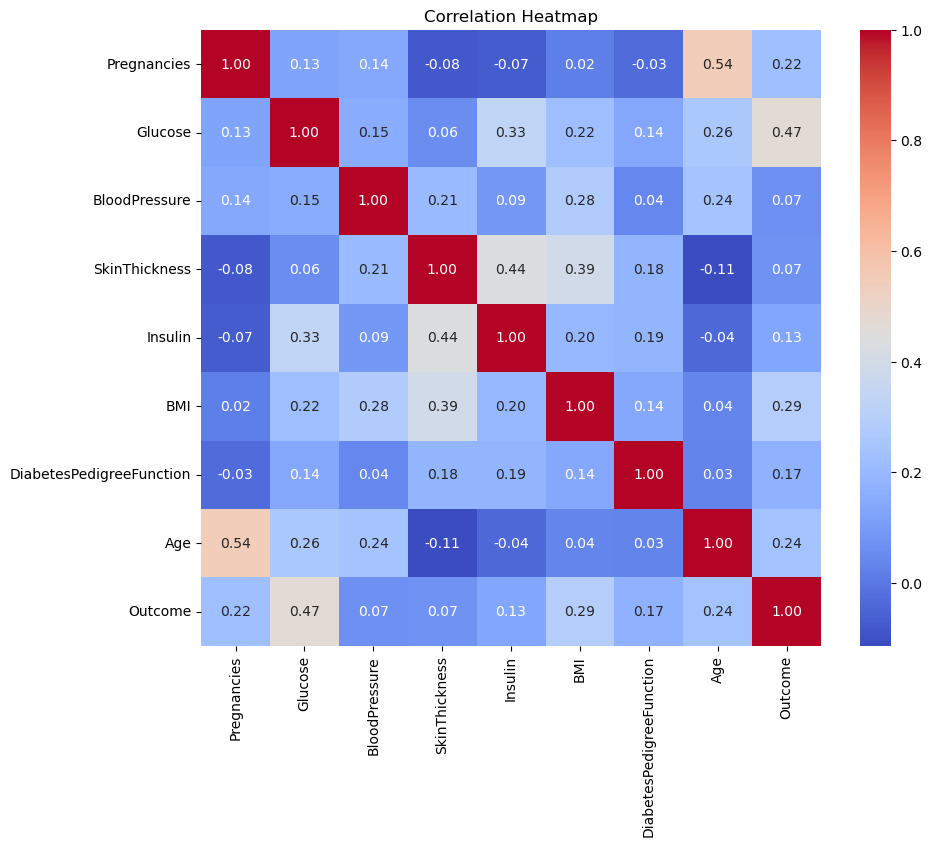

In [16]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

C:\Users\kcais\AppData\Local\Temp\ipykernel_19208\843293098.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Outcome'], palette="Set2")


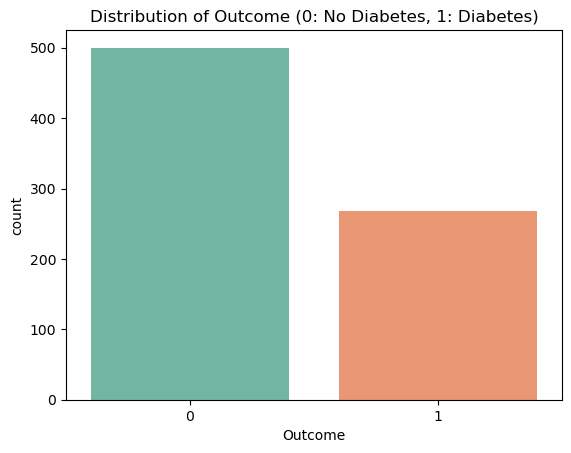

In [17]:
# Target distribution
sns.countplot(x=df['Outcome'], palette="Set2")
plt.title("Distribution of Outcome (0: No Diabetes, 1: Diabetes)")
plt.show()

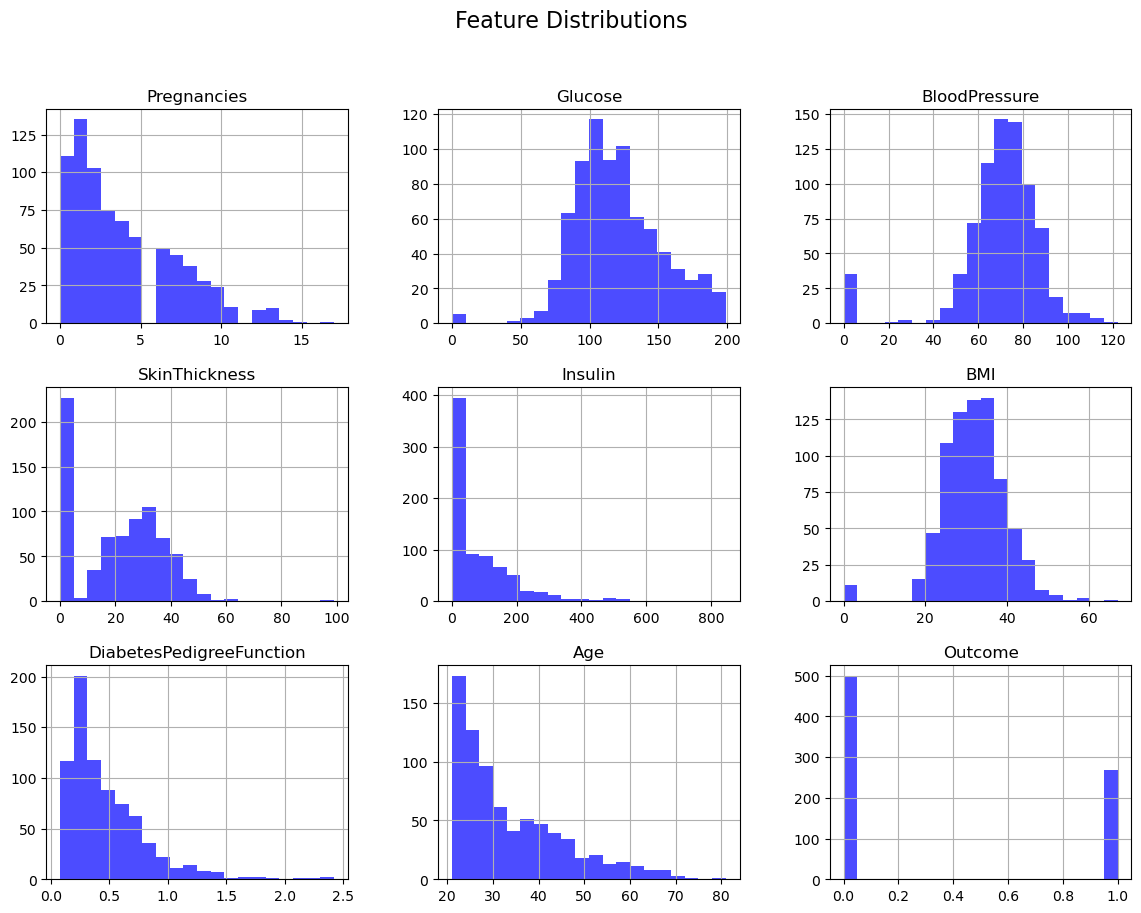

In [18]:
# Feature distribution
df.hist(bins=20, figsize=(14, 10), color='blue', alpha=0.7)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

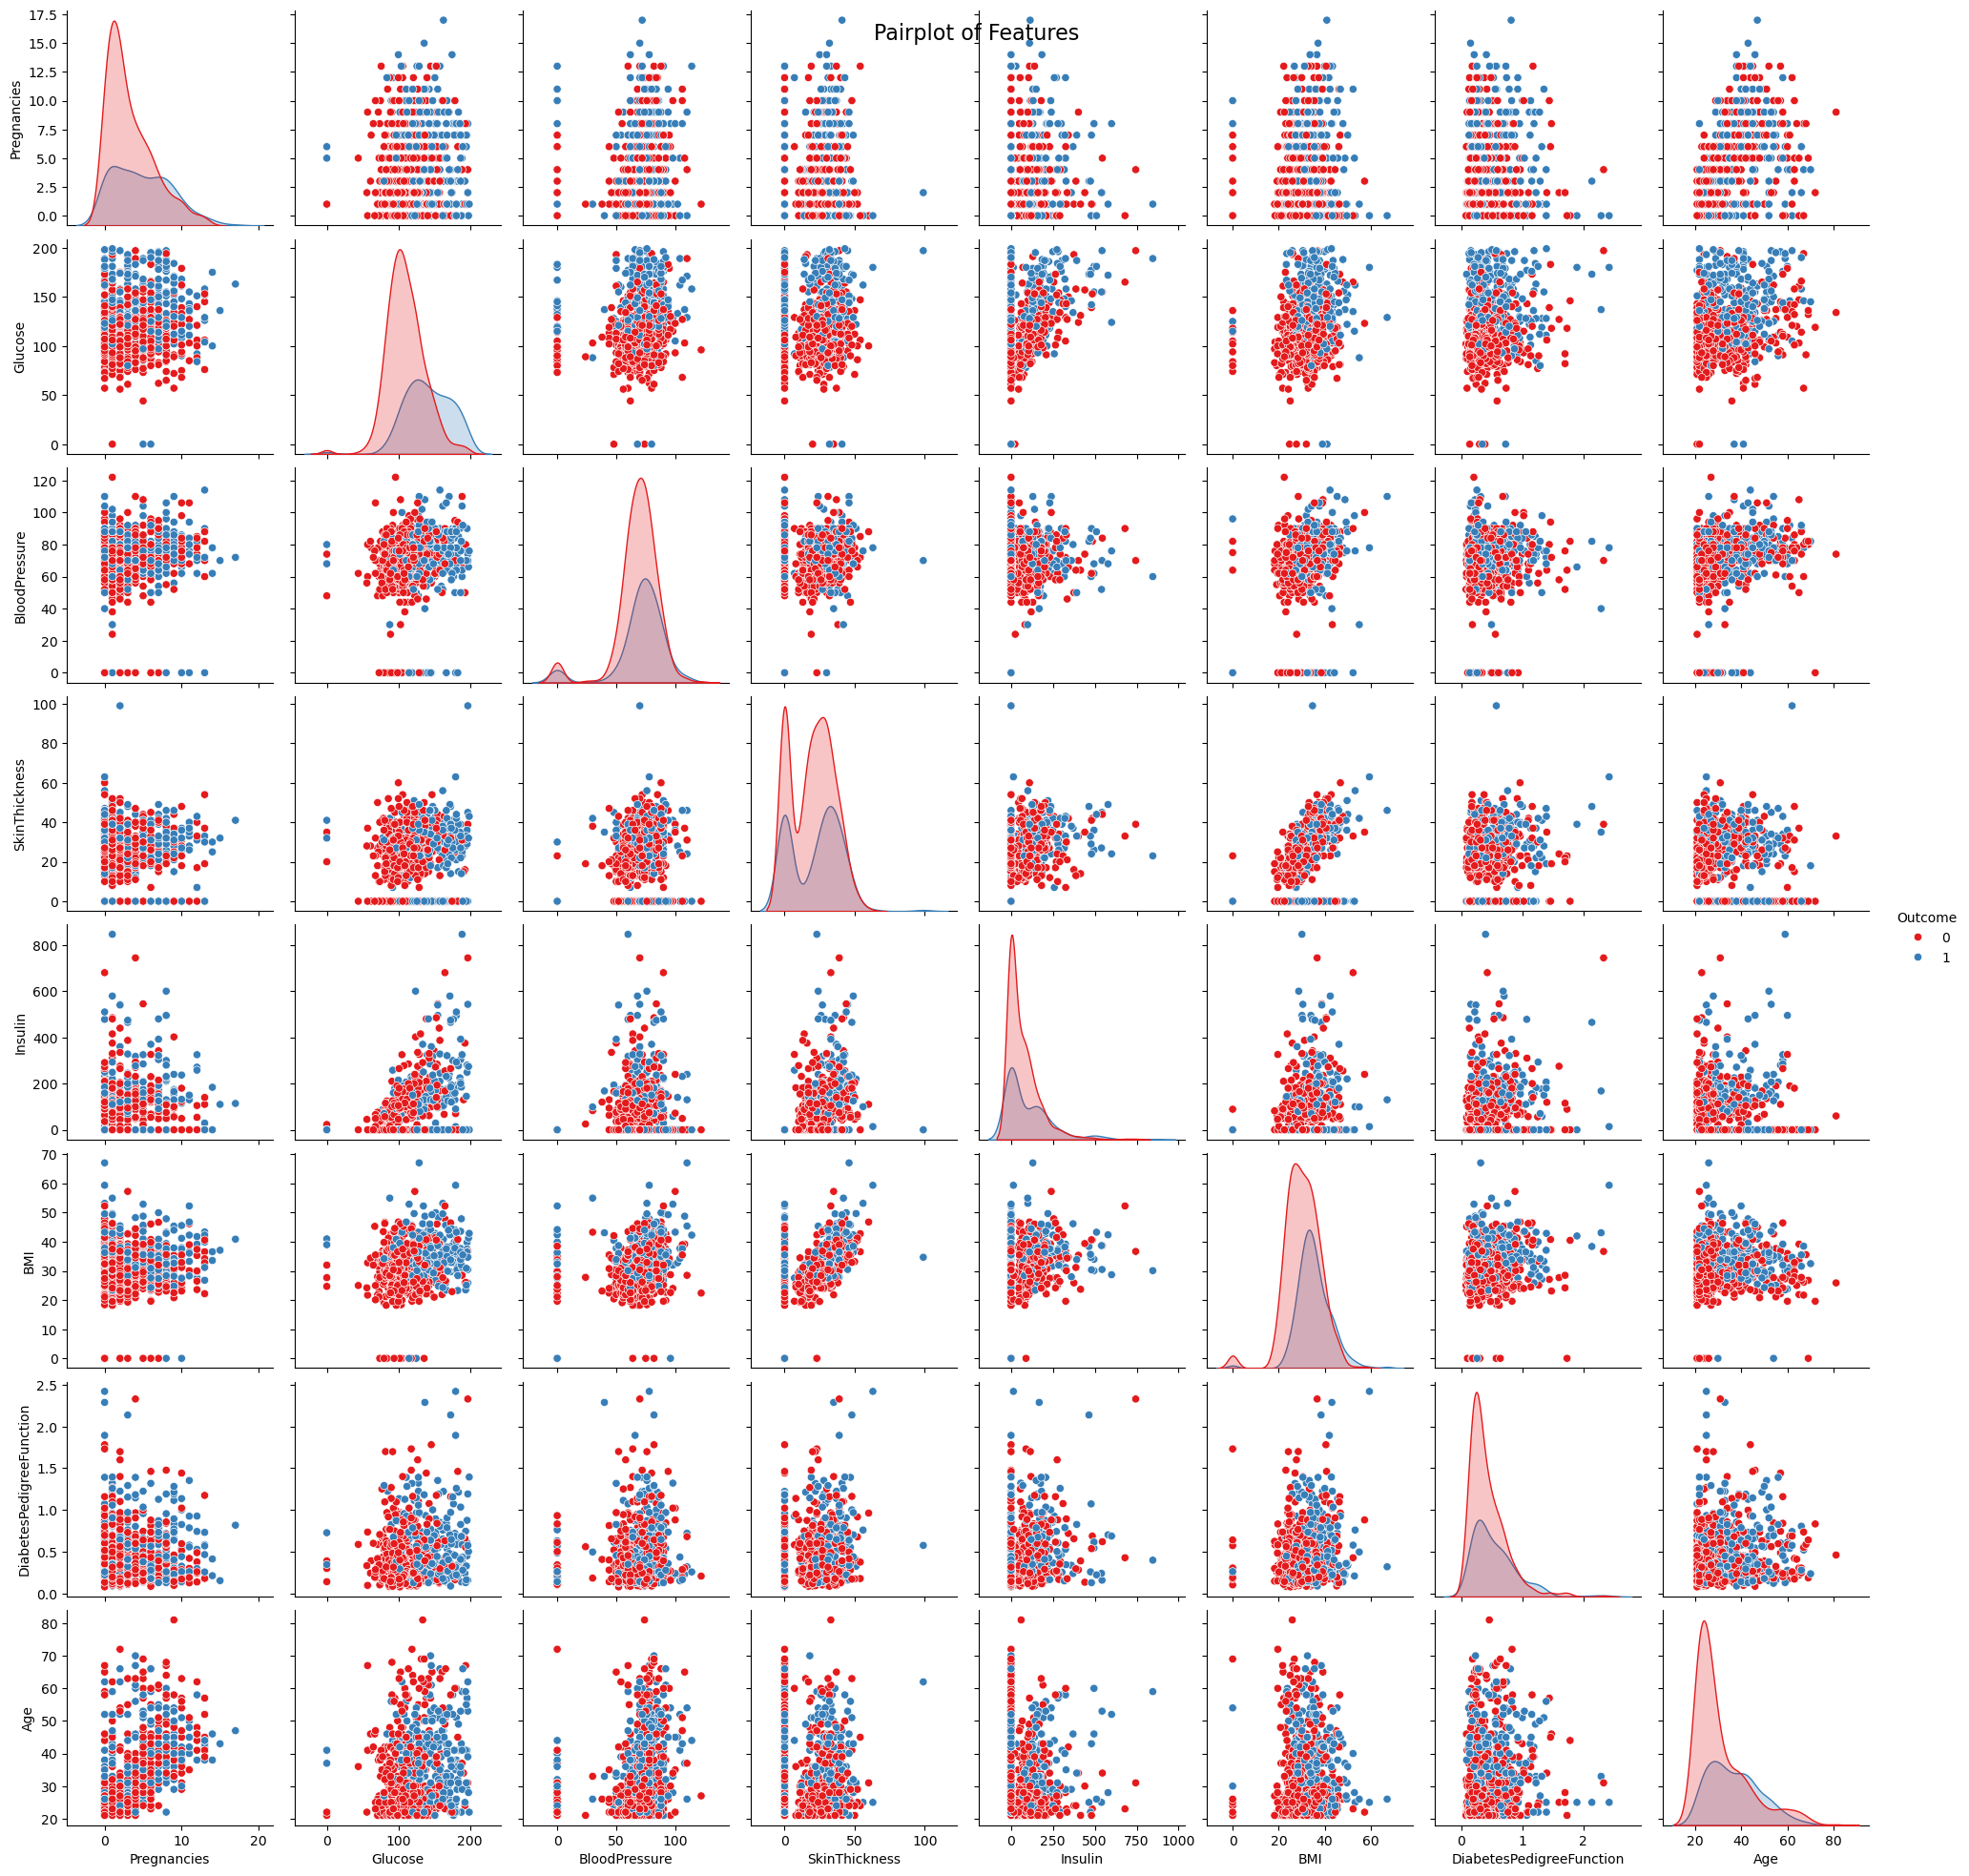

In [19]:
# Pairplot for visualizing relationships
sns.pairplot(df, hue='Outcome', palette="Set1")
plt.suptitle("Pairplot of Features", fontsize=16)
plt.show()

### Data Preprocessing

In [9]:
# separating the features and target variable
X = df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']

In [10]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [11]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [12]:
# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split
# For scaling features to standardize the data
from sklearn.preprocessing import StandardScaler

In [20]:
#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [25]:
# Standardizing the feature values (for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Training the Model

### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report 

In [27]:
lr = LogisticRegression()
# Train the model on the training data
lr.fit(X_train,y_train)
# Predict the target variable for the test data
y_pred_lr = lr.predict(X_test)

#Performance Evaluation
conf_matrix = confusion_matrix(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
class_report = classification_report(y_test, y_pred_lr, output_dict=True)

precision_lr = class_report['1']['precision']
recall_lr = class_report['1']['recall']
f1_lr = class_report['1']['f1-score']

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy Score:", accuracy_lr)
print("F1 Score:", f1_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)

Confusion Matrix:
 [[82 18]
 [26 28]]
Accuracy Score: 0.7142857142857143
F1 Score: 0.56
Precision: 0.6086956521739131
Recall: 0.5185185185185185


### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf = RandomForestClassifier(n_estimators=500,random_state=42)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf, output_dict=True)

precision_rf = class_report['1']['precision']
recall_rf = class_report['1']['recall']
f1_rf = class_report['1']['f1-score']

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy Score:", accuracy_rf)
print("F1 Score:", f1_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)

Confusion Matrix:
 [[81 19]
 [22 32]]
Accuracy Score: 0.7337662337662337
F1 Score: 0.6095238095238096
Precision: 0.6274509803921569
Recall: 0.5925925925925926


### Model Comparison

In [30]:
#Metrics data frame
metric_df = pd.DataFrame({'Model':['Logistic Regression', 'Random Forest'],
                          'Accuracy_score':[accuracy_lr,accuracy_rf] ,
                         'f1_score':[f1_lr,f1_rf],
                         'Precision':[precision_lr,precision_rf],
                         'Recall':[recall_lr,recall_rf]})

In [31]:
#Display the DataFrame
metric_df

,Model,Accuracy_score,f1_score,Precision,Recall
0,Logistic Regression,0.714286,0.560000,0.608696,0.518519
1,Random Forest,0.733766,0.609524,0.627451,0.592593


In [32]:
y_pred_df = pd.DataFrame({'Logistic Regression':y_pred_lr,
                         'Random Forest':y_pred_rf,
                         'Original':y_test})
y_pred_df # Values predicted by different models side by side with original labels

,Logistic Regression,Random Forest,Original
44,1,1,0
672,0,0,0
700,0,0,0
630,0,0,1
81,0,0,0
...,...,...,...
32,0,0,0
637,0,0,0
593,0,0,0
425,1,1,1
